<a href="https://colab.research.google.com/github/ksachdeva/ml-in-hurry/blob/master/Machine_Learning_In_Hurry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>>>>> <img src="https://media.giphy.com/media/l41lUYsrdGwRowfss/giphy.gif" alt="" title="" />  

>>>>>> # Machine Learning In Hurry

# Python module imports

In [0]:
# Install all the dependencies

# Various imports
%matplotlib inline

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import HTML

#Mathematics Review

##  Polynomials

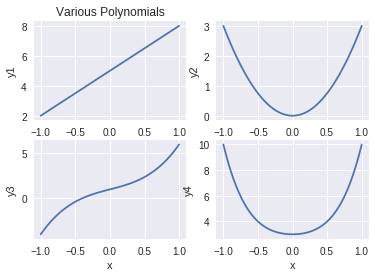

In [0]:
# get evenly spaced numbers over a specified interval.
x1 = np.linspace(-1, 1, 100)  

y1 = (3*x1 + 5)               # degree 1, binomial
y2 = (3*x1**2)                # degree 2, monomial
y3 = (3*x1**3 + 2*x1 + 1)     # degree 3, binomial
y4 = (4*x1**4 + 3*x1**2 + 3)  # degree 4, trinomial

# let's plot them
plt.subplot(2, 2, 1)
plt.plot(x1, y1)
plt.title('Various Polynomials')
plt.ylabel('y1')
plt.xlabel('x')

plt.subplot(2, 2, 2)
plt.plot(x1, y2)
plt.ylabel('y2')
plt.xlabel('x')

plt.subplot(2, 2, 3)
plt.plot(x1, y3)
plt.ylabel('y3')
plt.xlabel('x')

plt.subplot(2, 2, 4)
plt.plot(x1, y4)
plt.ylabel('y4')
plt.xlabel('x')

plt.show()

## Functions

### Math vs Programming 


> $y$ = $3x$ + 5


The above expression can also be written as 


> $f(x)$  = $3x$ + 5


If we were to use a programming language to implement above we would write it as :


```python
# a python function
def myFun(x):
  return 3*x + 5

y = myFun(45)

```

```javascript
// a javascript function
function myFun(x) {
  return 3*x + 5
}

var y = myFun(5)

```

Pretty similar however for the same function

* mathematician will say that  $y$ is  a **dependent** variable and $x$ is an **independent** variable.

* programmer will say that $x$ is an **input** (or **parameter** or **argument**) and $y$ is an **output** and the name of function is **myFun**.


Now let's consider this -


```python
# a python function
def myFun2(x):
  x2 = 3*x + 5
  x3 = makeHttpCall(x2)    # <-- introduces side effects
  return x3

y = myFun(45)

```

While above is still a function from a programming language point of view it is not a **pure** function as it has **side effects**.  In other words, the output of this function is not **deterministic** and or repetable.



### Types of functions

*Univariate function*  (=> 1 independent variable)

> $f(x)$ = $y = 3x + 5$

*Bivariate function* (=> 2 independent variables)

> $f(x,z)$ = $y = 3x + 7z + 3$ 

*Multivariate function*  (=> 2 or more independent variables)

> $f(x,z,a)$ = $y = 3x + 7z + 9a + 32$



### Difference between mathematical functions & programming language functions

> In $y = 3x + 7z + 5$,  

>> 3 is called a **coefficient** or **weight** of $x$

>> 7 is called a **coefficient** or **weight** of $z$

>> 5 is called **bias**

> Collectively 3, 7, and 5 are called **parameters**   <----- note this is different from programming languages where **inputs** of a function are also called **parameters**


### Now, let's try to write the equation in a general form


> $y$ = $w_1x + w_2z + b$ 

>> or better 

> $y$ = $w_1x_1 + w_2x_2 + b$ 

>> where


>$x_1$, $x_2$ are called **dependent variables** or **features**.

>> # ** YES ONE MORE NAME FOR THE SAME THING :( **

>> ![alt text](https://media.giphy.com/media/vh9isNb4S2Spa/giphy.gif)


### Composing functions in mathematics and functional programming

> Given two functions -

> $f(x) = 3x + 5$

> $g(x) = 7x^2 + 4$


> you can compose them as :  $y = f(g(x))$


**Note - Using above style of functional composition when doing regular programming will provide you enormous benefits over procedural and object oriented programming !!**


## Differential Calculus

Mathematics of computing the change in the **output** ($y$ or $f(x)$) for a very tiny change in the **input** (dependent variable(s))

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Tangent-calculus.svg/300px-Tangent-calculus.svg.png)


$f'(x)$ = $\frac{dy}{dx}$













In [0]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/WUvTyaaNkzM" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

#Fitting the curve

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Curve_fitting.svg/300px-Curve_fitting.svg.png)

### Generate synthetic data that has some linear relationship

In [0]:
# let's generate some random points which based on a linear (polynomial of degree 1)
def generate_synthetic_data(num_samples):
  X = np.array(range(num_samples))
  random_noise = np.random.uniform(-10,90,size=num_samples)
  
  # this is our linear equation
  # coefficient or weight is 3.65
  # bias is random (but uniform)
  y = 3.65*X + random_noise     # <------- PAY ATTENTION TO THIS !!
  
  return X,y


# generate
X, y = generate_synthetic_data(30)

# let's have a look at the generated data
data = np.vstack([X, y]).T
df = pd.DataFrame(data, columns=['X', 'y'])
df.head(n=5)

,X,y
0,0.0,55.629092
1,1.0,53.286650
2,2.0,6.344955
3,3.0,37.199684
4,4.0,73.476137


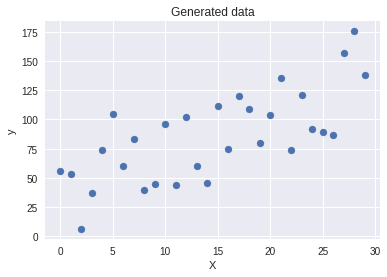

In [0]:
# visualize the generated data
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Which polynomial will describe our dataset the best ? 


>>  ![alt text](https://media.giphy.com/media/2wWBMyd02oMVJqTPZW/giphy.gif)





#### Guess the parameters !!  ..... SERIOUSLY 

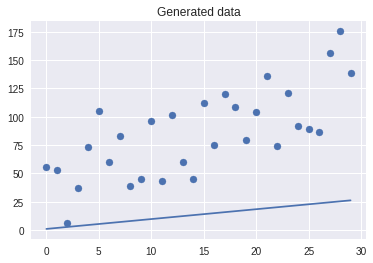

In [0]:
# Let's guess W1 and b and plot the resulting line

w1 = 0.87
b  = 0.98

y_pred = w1*X + b


plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.plot(X, y_pred)

plt.show()


#### Find the residual or how far away the curve is from the actual points

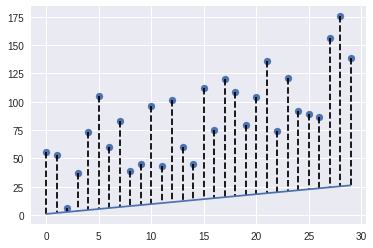

In [0]:
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X, y_pred)

# find the difference between
# predicted and actual value
dy = y_pred - y    # <---- residual (or loss !)

ax.vlines(X,y,y+dy, linestyles='dashed')

plt.show()

### Compute the cost of the prediction (or should I say @@ GUESS @@)

In [0]:
# See the loss per sample 
loss = (y - y_pred)
print(loss)

[ 54.64909184  51.43665013   3.62495487  33.60968445  69.01613727
  99.75094762  53.73869875  75.83413105  31.29845743  36.16838145
  86.50154681  33.10049527  90.31662651  48.05850973  32.17823535
  97.86929346  59.89582001 104.03508508  92.36377623  62.21161238
  85.49715373 116.62419717  54.1322145  100.02069341  69.59853423
  66.90590103  62.94079942 132.1632835  150.19248201 112.16645764]


#### Mean Squared Error

> $loss$ = $(y - y__pred)$

Above way of computing the loss does not take care of the negative and does not bring up to scale and hence 
we take the square of it to remove the **negativity**.

We also intend to take the average (mean) of the loss across all the samples and hence **Mean Squared Error** (or **MSE** for short !)



In [0]:
# Mean squared error
mse = (np.square(y - y_pred)).mean(axis=0)
print(f"Mean squared error for all samples {mse}")

Mean squared error for all samples 6287.309780970339


---

Let's write our loss i.e.

```python
mse = (np.square(y - y_pred)).mean(axis=0)
```

as a mathematical function

> $f(w_1, b)$ = $\frac{1}{N}\sum_{i=1}^{N} (y - (w_1x + b))^2$


Essentially, we now have a function (called loss function) that depends on ($w_1$ and $b$) and is of **quadratic in nature (i.e. is of degree 2)**


### Goal is to reduce/minimise the MSE !!

Since it is clear that the our loss function i.e. $f(w_1,b)$ depends on $w_1$ and $b$, so if we could adjust their values in such a way that value of $f(w_1,b)$ approaches **ZERO** !!

>> **BUT THIS BRINGS UP FOLLOWING QUESTIONS**


*Should we add to w1 and b ? or remove ? *

>> <img width=80 height=80 src="https://media.giphy.com/media/hTD23t0ABhv3SYCAGk/giphy.gif">

*And what should we add and/or remove to $w_1$ and $b$ ? *

>> <img width=80 height=80 src="https://media.giphy.com/media/4N1H43j8owKK24V2j6/giphy.gif">

### Loss Vs Weight


![alt text](https://developers.google.com/machine-learning/crash-course/images/convex.svg)

![alt text](https://i.ytimg.com/vi/b4Vyma9wPHo/maxresdefault.jpg)

In [0]:
class GradientDescentExample(object):
  def __init__(self):
    
    # create a range of weights
    w_min = -30
    w_max = 30
   
    self.w = np.linspace(w_min, w_max, 200)
    
    self.y = GradientDescentExample.f(self.w)
    
    self.learning_rate = .05  # Learning rate
    
    
    self.w_est = -25   # Starting point (the GUESS !!)
    self.y_est = GradientDescentExample.f(self.w_est)  
    
    
    # code to setup our graph etc
    self.fig, ax = plt.subplots()    
    ax.set_xlim([w_min, w_max])
    ax.set_ylim([-5, 1500])    
    ax.set_xlabel("w")
    ax.set_ylabel("f(w)")
    
    plt.title("Gradient Descent")
    self.line, = ax.plot([], [])
    self.scat = ax.scatter([], [], c="red")
    self.text = ax.text(-25,1300,"")
  
  @staticmethod
  def f(w):
    # loss function to minize
    # This loss function depends on quadratic w
    return w**2 + 5 * w + 24
  
  @staticmethod
  def fd(w):
    # Derivative of the function
    return 2*w + 5  
  
  # @staticmethod
  def animate_fn(self, i):    

    # Gradient descent
    self.w_est = self.w_est - GradientDescentExample.fd(self.w_est) * self.learning_rate
    self.y_est = GradientDescentExample.f(self.w_est)

    # Update the plot
    self.scat.set_offsets([[self.w_est,self.y_est]])
    self.text.set_text("Value : %.2f" % self.y_est)
    self.line.set_data(self.w, self.y)
    return self.line, self.scat, self.text
  
  def run(self):
    anim = animation.FuncAnimation(self.fig, self.animate_fn, 50, interval=1000, blit=True)
    return HTML(anim.to_html5_video())   
    


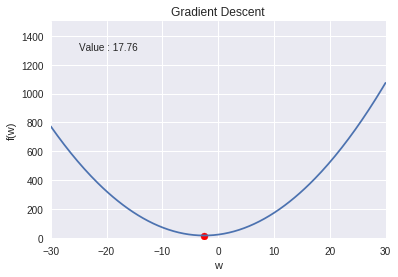

In [0]:
gd_example = GradientDescentExample()
gd_example.run()

### Real world loss function vs weight plot

![alt text](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0405.png)

In [0]:
# let's first define out cost function 
# so that we can invoke with updated values of w & b

def cost_fn(x, y_actual, w, b):
  y_new_pred = w*x + b
  mse = (np.square(y_actual - y_new_pred)).mean(axis=0)
  return mse
  

In [0]:
def update_parameters(x, y_actual, w, b, learning_rate):
    weight_deriv = 0
    bias_deriv = 0
    num_of_samples = len(x)

    # we go over all the samples
    for i in range(num_of_samples):
        # Calculate partial derivatives
        # -2x(y - (wx + b))
        weight_deriv += -2*x[i] * (y[i] - (w*x[i] + b))

        # -2(y - (wx + b))
        bias_deriv += -2*(y[i] - (w*x[i] + b))

    # We subtract because the derivatives point in direction of steepest ascent
    w -= (weight_deriv / num_of_samples) * learning_rate
    b -= (bias_deriv / num_of_samples) * learning_rate

    return w, b

In [0]:
def train(x, y_actual, w, b, learning_rate, iters):
    cost_history = []
    w_history = []
    b_history = []
    

    for i in range(iters):
        w, b = update_parameters(x, y, w, b, learning_rate)
        w_history.append(w)
        b_history.append(b)

        cost = cost_fn(x, y, w, b)
        cost_history.append(cost)

        # Log Progress
        if i % 10 == 0:
            print("iter: "+str(i) + " cost: "+str(cost))

    return w, b, cost_history, w_history, b_history

In [0]:
w, b, cost_history, w_history, b_history = train(X, y, w1, b, 0.0001, 190)

iter: 0 cost: 5711.746184297781
iter: 10 cost: 2524.678559942841
iter: 20 cost: 1542.7285663295545
iter: 30 cost: 1239.9808853065085
iter: 40 cost: 1146.435764420625
iter: 50 cost: 1117.3277864690838
iter: 60 cost: 1108.0675106832884
iter: 70 cost: 1104.9208678436046
iter: 80 cost: 1103.657603790023
iter: 90 cost: 1102.9747504770883
iter: 100 cost: 1102.47097819563
iter: 110 cost: 1102.0226723822886
iter: 120 cost: 1101.591757984751
iter: 130 cost: 1101.166507120183
iter: 140 cost: 1100.7433071422236
iter: 150 cost: 1100.321044992527
iter: 160 cost: 1099.8993775154063
iter: 170 cost: 1099.4781986945281
iter: 180 cost: 1099.0574755555876


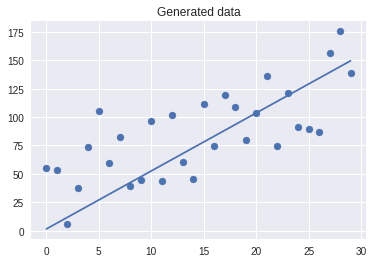

In [0]:
y_pred_2 = w*X + b


plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.plot(X, y_pred_2)
plt.show()

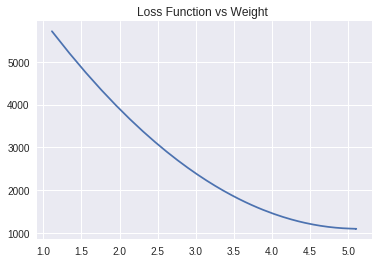

In [0]:
plt.title("Loss Function vs Weight ")
plt.plot(w_history, cost_history)
plt.show()

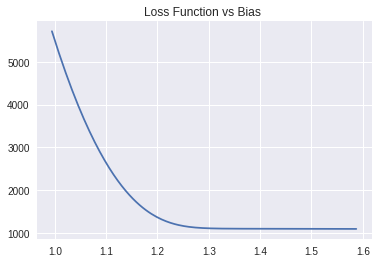

In [0]:
plt.title("Loss Function vs Bias ")
plt.plot(b_history, cost_history)
plt.show()

![alt text](https://cdn-images-1.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)

Here is what we have learned so far -

- A problem was being be modeled using a polynomial 

- The goal was to predict the value of **parameters** of the model/polynomial

- We guessed the initial parameters and computed how far away our prediction is from the actual value

- We then adjusted the parameters to reduce the loss and increase the accuracy using gradient loss


The end result was that we now have a *function* (*model*) that **approximately** solves our problem.




# Artificial Neural Networks  --> **THE FUNCTION APPROXIMATORS**







## The mighty neuron

![alt text](https://i.stack.imgur.com/xhGPV.png)





![alt text](https://images.xenonstack.com/blog/Working-Of-Artificial-Neuron.jpg)

## Neural network

![alt text](https://cdn-images-1.medium.com/max/1200/0*tUvxnJOc9dxEziaZ.jpg)

## The training algorithm

> ![alt text](https://www.researchgate.net/profile/Alireza_Amini6/publication/283397139/figure/fig2/AS:323456970313729@1454129559742/A-three-layered-feed-forward-neural-network-with-BP-training-algorithm.png)

### Psuedo algorithm for training for software engineers

1. Randomly (i.e. guess) set the initial value of $b$ & $w_1$ in $y = b + w_1x$

2. For every sample provided as part of training data compute the predicted value ($y_pred$)

3. Compare it with the observed value (i.e. the label) and apply the loss function i.e. if you are applying MSE, compute the SSE and take its mean

4. Based on the MSE, adjust  $w$ & $b$ 

5. Go back to step 2

6. Steps 2 to 5 are repeated until MSE is low enough to your satisfaction or defined number of iterations (called **epochs**) have been done


# Data is KING  !!!

![alt text](https://cdn-images-1.medium.com/max/1600/1*8fphzGUa4BdpoXaNGttziw.png)


**NOTE** -

$y$ = $f(x_1, x_2, x_3)$ is called **label** or **ground truth** or **observed value**


One of the biggest challenge is to have **data** that is **labelled** or in other words for given input **features** what is the **ground truth** !!




# Using ANN to train to predict the price of house


Attributes of this dataset

1. CRIM: per capita crime rate by town.
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town.
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. NOX: nitric oxides concentration (parts per 10 million).
6. RM: average number of rooms per dwelling.
7. AGE: proportion of owner-occupied units built prior to 1940.
8. DIS: weighted distances to ﬁve Boston employment centers.
9. RAD: index of accessibility to radial highways.
10. TAX: full-value property-tax rate per 10,000 dollars.
11. PTRATIO: pupil-teacher ratio by town.
12. B: 1000(Bk−0.63)^2 where Bk is the proportion of blacks by town.
13. LSTAT: Percent lower status of the population.
14. MEDV: Median value of owner-occupied homes in thousand dollars.

In [0]:
# Download the dataset
!wget -O boston_housing.csv https://raw.githubusercontent.com/kimanalytics/Regression-of-Boston-House-Prices-using-Keras-and-TensorFlow/master/housing.csv

--2019-01-10 20:25:30--  https://raw.githubusercontent.com/kimanalytics/Regression-of-Boston-House-Prices-using-Keras-and-TensorFlow/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49082 (48K) [text/plain]
Saving to: ‘boston_housing.csv’

boston_housing.csv  100%[===================>]  47.93K  --.-KB/s    in 0.03s   

2019-01-10 20:25:30 (1.86 MB/s) - ‘boston_housing.csv’ saved [49082/49082]



In [0]:
import pandas as pd

dataframe = pd.read_csv("/content/boston_housing.csv", delim_whitespace=True, header=None) 
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Develop a baseline model

In [0]:
# Regression Example With Boston Dataset: Baseline
import numpy
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def train_boston_housing_model():
  # load dataset
  dataframe = read_csv("/content/boston_housing.csv", delim_whitespace=True, header=None)
  dataset = dataframe.values
  
  # split into input (X) and output (Y) variables
  X = dataset[:,0:13]
  Y = dataset[:,13]
  
  # define base model
  def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')    
    return model
  
  model = baseline_model()
  model.summary()
  
  # fix random seed for reproducibility
  seed = 7
  numpy.random.seed(seed)
  
  NUMBER_OF_EPOCHS_TO_TRAIN = 20
  
  # evaluate model
  estimator = KerasRegressor(build_fn=baseline_model, epochs=NUMBER_OF_EPOCHS_TO_TRAIN, batch_size=5, verbose=0)
  kfold = KFold(n_splits=10, random_state=seed)
  results = cross_val_score(estimator, X, Y, cv=kfold)
  
  print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))
  
# train_boston_housing_model()  


Using TensorFlow backend.


# Machine learning branches

![alt text](https://raw.githubusercontent.com/trekhleb/homemade-machine-learning/master/images/machine-learning-map.png)

# What is the relation with Artificial Intelligence ?

![alt text](https://i.pinimg.com/originals/08/fa/69/08fa6996cac1b67224cc97e502c799dd.jpg)

# Image pre-processing

## What is an image ?








In [0]:
# download the test image
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

--2019-01-10 20:25:34--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png.2’

Lenna_(test_image). 100%[===================>] 462.73K  1.94MB/s    in 0.2s    

2019-01-10 20:25:35 (1.94 MB/s) - ‘Lenna_(test_image).png.2’ saved [473831/473831]



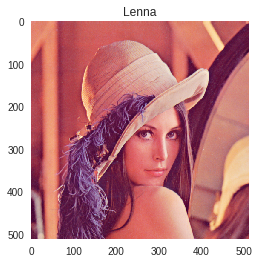

In [0]:
def display_lenna():
  img = cv2.imread("/content/Lenna_(test_image).png")
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.grid(False)
  plt.title('Lenna')
  plt.show()
  
display_lenna()

### Mathematician 

To a mathematician it a function of two independent variables ---> $f(x, y)$

Where x & y are the spatial co-ordinates &

Amplitude (a) of the function is the intensity of the image at a given point (x1, y1)

For “digital” image – $x$, $y$ & $a$ are discrete and finite


### To a programmer (computer)

It is a 2D array

* An array is a sequence of numbers

* The memory for computer is linear but programming languages provide a way to represent 2D data as 2D arrays and traverse through the linear data as if it is 2D

![alt text](https://www.codingeek.com/wp-content/uploads/2017/01/2D-arrays.png)




---

The value of $f(x,y)$ is in the range (0, 255) 

** Then how do we represent a color image ?**

![alt text](https://www.researchgate.net/profile/Jane_Courtney2/publication/267210444/figure/fig6/AS:295732335661069@1447519491773/A-three-dimensional-RGB-matrix-Each-layer-of-the-matrix-is-a-two-dimensional-matrix.png)

For a programmer -> it is an array of three 2D arrays

For a mathematician -> it is a vector of three functions of form [$f(x,y)$,$f(x,y)$,$f(x,y)$]


## Finding a pattern in the image

### Filters

A filter is a **template** that is applied on the target image to find pattern and generate a filtered image !

![alt text](https://cdn-images-1.medium.com/max/1200/1*1okwhewf5KCtIPaFib4XaA.gif)


The filters are generally of **odd** sizes e.g. 3x3, 5x5 and 7x7






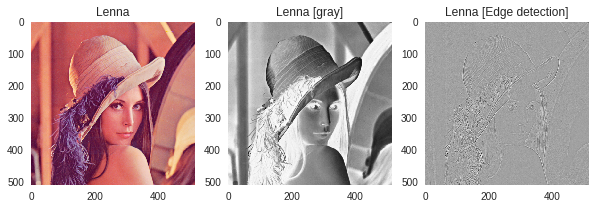

In [0]:
def apply_edge_filter_to_lenna():
  
  plt.figure(figsize=(10,3))
  
  # display colored lenna  
  img = cv2.imread("/content/Lenna_(test_image).png")
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.subplot(1, 3, 1)
  plt.imshow(img)
  plt.grid(False)
  plt.title('Lenna')
    
  
  image = cv2.imread('/content/Lenna_(test_image).png', cv2.IMREAD_GRAYSCALE).astype(float) / 255.0
  
  # display gray lenna
  plt.subplot(1, 3, 2)
  plt.imshow(image)
  plt.grid(False)
  plt.title('Lenna [gray]')
  
  kernel = np.array([[-1, -1, -1],
                     [-1, 8, -1],
                     [-1, -1, -1]])


  filtered = cv2.filter2D(src=image, kernel=kernel, ddepth=-1)

  plt.subplot(1, 3, 3)
  plt.imshow(filtered)
  plt.grid(False)
  plt.title('Lenna [Edge detection]')
  plt.show()
  
apply_edge_filter_to_lenna()

### Convolution (actually Cross Correlation operation)


![alt text](https://cdn-images-1.medium.com/max/1600/1*_34EtrgYk6cQxlJ2br51HQ.gif)


>> ![alt text](https://graphics.stanford.edu/courses/cs178/applets/convolution-equation1-2c.jpg)




---


## The rock stars here are ---------->  "FILTERS" !

When doing traditional image processing, these filters are manually created/discovered/learned and unfortunately the domain of object detection is so big that crafting them manually does not work !!

We transform our problem from crafting these filters to discover (learn) these filters with the help of neural networks.

This is where image processing meets machine learning and we go into computer vision !!


> ![alt text](https://media.giphy.com/media/l3dj09hpsfuYkijDi/giphy.gif)

# Computer Vision


![alt text](http://www.themtank.org/images/c-image12.jpg)

# Convolutional Neural Network

![alt text](https://cdn-images-1.medium.com/max/1600/1*NQQiyYqJJj4PSYAeWvxutg.png)


** Could we not use Artifical Neural Networks ?**

The answer is we can but since every pixel in an image is considered an input **feature** there are just too many features which implies too many **parameters** to learn.

Also, unlike regression style (numerical) problems our target is learn the **parameters** (filters) in a **scale** and **location** agnostic (variance) manner. 


A CNN follows the similar priniciples of ANN i.e. notion of layers, neurons, loss function, back propagation but the initial layers in it perform **cross correlation** operation to reduce the size of features and learn the 2D filters.






# Image Classification  

![alt text](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/38211dc39e41273c0007889202c69f841e02248a/2-Figure1-1.png)

![alt text](https://thegradient.pub/content/images/2018/07/image_1.png)


![alt text](https://www.researchgate.net/profile/Gustav_Von_Zitzewitz/publication/324476862/figure/fig7/AS:614545865310213@1523530560584/Winner-results-of-the-ImageNet-large-scale-visual-recognition-challenge-LSVRC-of-the.png)

## Going deeper

![alt text](https://www.researchgate.net/profile/Kien_Nguyen26/publication/321896881/figure/fig1/AS:573085821489153@1513645715549/The-evolution-of-the-winning-entries-on-the-ImageNet-Large-Scale-Visual-Recognition.png)

## Alexnet

![alt text](https://image.slidesharecdn.com/introtocnns-170414043209/95/intro-to-convolutional-neural-networks-15-638.jpg?cb=1492144489)


## VGG 16

> ![alt text](https://qph.fs.quoracdn.net/main-qimg-ba81c87204be1a5d11d64a464bca39eb)


As shown earlier, the classification networks typically have a fully connected (also called Dense) layers towards the end followed by *softmax* activation layer.

The output (thanks to *softmax* layer) is a vector (array) of length equal to the number of classes/categories (in this case 1000). The value of each element of this vector (array) 



In [0]:
from keras.applications.vgg16 import VGG16
model = VGG16()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
# download some sample images
!wget https://i.ytimg.com/vi/UJ6GmaZVFkU/maxresdefault.jpg

--2019-01-10 20:25:42--  https://i.ytimg.com/vi/UJ6GmaZVFkU/maxresdefault.jpg
Resolving i.ytimg.com (i.ytimg.com)... 108.177.97.119, 74.125.204.119, 64.233.187.119, ...
Connecting to i.ytimg.com (i.ytimg.com)|108.177.97.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77564 (76K) [image/jpeg]
Saving to: ‘maxresdefault.jpg.2’

maxresdefault.jpg.2 100%[===================>]  75.75K  --.-KB/s    in 0.001s  

2019-01-10 20:25:42 (76.7 MB/s) - ‘maxresdefault.jpg.2’ saved [77564/77564]



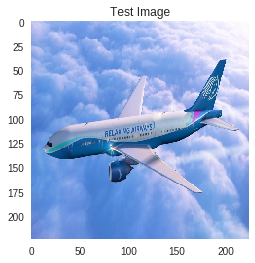

In [0]:
# pre-process the image as required by VGG
from keras.preprocessing.image import load_img as load_img_for_inference
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

# load an image from file
image = load_img_for_inference('/content/maxresdefault.jpg', target_size=(224, 224))

plt.imshow(image)
plt.grid(False)
plt.title('Test Image')
plt.show()

image = img_to_array(image)

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

image = preprocess_input(image)


In [0]:
yhat = model.predict(image)

In [0]:
from keras.applications.vgg16 import decode_predictions

# convert the probabilities to class labels
labels = decode_predictions(yhat)

# retrieve the most likely result, e.g. highest probability
label = labels[0][0]
print('%s (%.2f%%)' % (label[1], label[2]*100))

airliner (96.44%)


## MNIST - Handwritten digits data set  <----- HELLO WORLD of Computer Vision


In [0]:
#@title
import keras
from keras.datasets import mnist
from keras.optimizers import RMSprop, Adam
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# Download
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# look at the shape of the data
print(f"X -: {train_images.shape}")
print(f"Y -: {train_labels.shape}")


X -: (60000, 28, 28)
Y -: (60000,)


In [0]:
#@title
# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

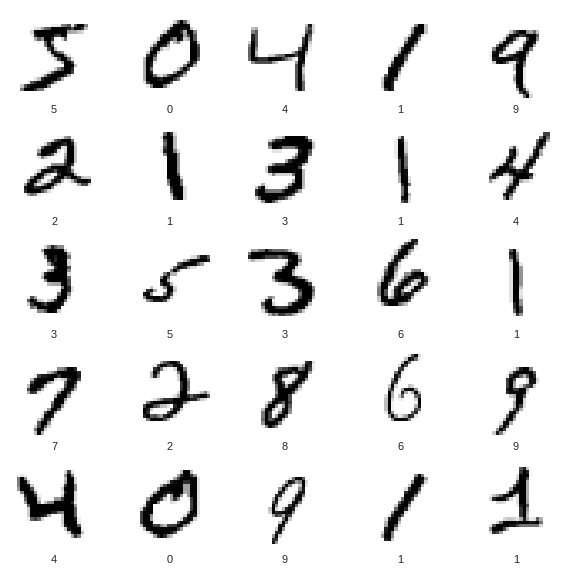

In [0]:
#@title
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[train_labels[i]])

In [0]:
#@title
LOSS_FUNCTION_NAME = 'categorical_crossentropy'

def build_mnist_cnn_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  
  # Since the output is softmax
  # you will be get an array of 10
  # which will have the probability distribution
  # for prediction of each number
    
  optimizer = RMSprop()
  # optimizer = Adam()
  
  model.compile(optimizer=optimizer, 
              loss=LOSS_FUNCTION_NAME,
              metrics=['accuracy'])
  
  model.summary()
  return model

cnn_model = build_mnist_cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                589888    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
__________

### Categorical

As you noticed that the output of our network is an array of size 10 and every element will correspond to the probability for that number. e.g.

If you get

```
 [0.00008949411491 0.00024327022631 0.00179753734943 0.00488621311294
 0.72517832414024 0.00066127703559 0.00024327022631 0.00008949411491
 0.26677819663436 0.00003292304498]
```


 It would mean that the probability that **number is 4 is 72.51783%** and that **it is 8 is 26.67%**
 
 A cost function calculates the difference between the **true** value and the **predicted** value !!
 
Now our predicted value is an array of size 10 that has probability distribution as its value however our ground truth value is a *scalar* (i.e. a number )
 
 Since there is a mistmatch here we would convert our **true** values (observed values) into *categorical* variables.
 
 This is also known as **one-hot-encoding** !
 

In [0]:
#@title
# transform our labels into categorical variables
train_labels_categorical = keras.utils.to_categorical(train_labels)
test_labels_categorical = keras.utils.to_categorical(test_labels)

print(f"label - {train_labels[0]} categorical_label - {train_labels_categorical[0]}")
print(f"label - {train_labels[98]} categorical_label - {train_labels_categorical[98]}")

label - 5 categorical_label - [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
label - 3 categorical_label - [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### Cross Entropy

“The ultimate purpose of life, mind, and human striving: to deploy energy and information to fight back the tide of **entropy** and carve out refuges of beneficial order.” —Steven Pinker

Disorder can occur in many ways, but order, in only a few !! ....... this is the very essence of **Entropy**

For more philosophy on entropy go [here](https://jamesclear.com/entropy)

For math go  [here](https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/)


In [0]:
#@title
# reshape
reshaped_train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
reshaped_test_images = test_images.reshape(test_images.shape[0], 28,28, 1)

# look at the shape of the reshaped images
print(f"X -: {reshaped_train_images.shape}")
print(f"Y -: {train_labels.shape}")

X -: (60000, 28, 28, 1)
Y -: (60000,)


In [0]:
#@title
# Run training
cnn_model.fit(reshaped_train_images, train_labels_categorical, epochs=1)

Epoch 1/1
60000/60000 [==============================] - 17s 282us/step - loss: 0.2591 - acc: 0.9217


In [0]:
#@title
# Run evaluation on test_labels
test_loss, test_acc = cnn_model.evaluate(reshaped_test_images, test_labels_categorical)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 100us/step
Test accuracy: 0.9798


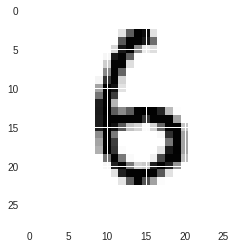

In [0]:
#@title
# Run prediction
TEST_IMAGE_NUMBER = 21
probe_img = test_images[TEST_IMAGE_NUMBER]
plt.imshow(probe_img)

In [0]:
#@title
probe_img = reshaped_test_images[TEST_IMAGE_NUMBER]

print(f"Shape of image is {probe_img.shape}")
# transform it in batch [X, 28, 28, 1] where X will be 1 in this
# case we only have one image
batch_probe_img = (np.expand_dims(probe_img,0))
print(f"Shape of image in batch mode is {batch_probe_img.shape}\n")

# now run the predict on batch of 1
predictions_single = cnn_model.predict(batch_probe_img)
# predictions_single = dnn_model.predict(probe_img)

print(f"Prediction is - {predictions_single}\n")
print(f"Actual Label - {test_labels[TEST_IMAGE_NUMBER]} / Predicted Label - {np.argmax(predictions_single)}")


Shape of image is (28, 28, 1)
Shape of image in batch mode is (1, 28, 28, 1)

Prediction is - [[5.7439038e-08 8.1748353e-10 1.4044410e-10 8.6810620e-10 2.0986246e-08
  3.1166510e-05 9.9996853e-01 1.6564258e-12 2.0947165e-07 4.0995876e-10]]

Actual Label - 6 / Predicted Label - 6


# Facial Recognition 

This is one of the most exciting application of computer vision. It tries to address two (some what related yet different) problems.

###  Verification

- Is this person who they say they are ?

- An individual presents himself/herself as a specific person

- Essentially it is about 1-1 matching system


### Identitifcation


- Who is this person ? Or who generated this given biometric ?

- Essentially it is about 1-n matching system



>> ![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS09v52g5nzXNZgaLH2HT7e2tNDNpDHz1OKl6TeR7ZCdquaHkFC)



## Pipeline

![alt text](https://www.pyimagesearch.com/wp-content/uploads/2018/09/opencv_face_reco_facenet.jpg)


** WHY REPRESENTATION & NOT CLASSIFICATION **

In image classification we saw that the last layer of the deep neural network was a "softmax" layer that gave the probabilities corresponding to all the classes (1000).

Now both face verification & identification are "classification" problems however the number of classes of humans (equal to world population !!!) would make it difficult to use the same approach and training the network for just your own classes (also called **Closed Set** ) would not really address the real world problems of detecting an unauthorized human.

Instead another approach called **Representation learning** is used.

In terms of training most of the time a data set of human faces is picked. Let's say that dataset has 10,000 classes and each class has 300 images or so. As you can already appreciate building this kind of **labelled** dataset itself is not easy.

You would use a CNN with different types of loss functions (metric loss functions, classification loss functions ........ formulating the appropriate loss function is one of the key areas of research and improvement with respect to facial recognition) with the goal that one of the final layers would learn some **latent information/representation/features** of the class.

At inference time, you would get the face representation (also called **feature vector**, **embedding**, **face descriptor**) and then run other myriad of machine learning algorithms to match it against what you have in your enrollment database !!


![alt text](https://www.researchgate.net/profile/Zahid_Akhtar/publication/316496813/figure/download/fig1/AS:488872669913088@1493567735381/Tasks-in-a-face-recognition-system-FRS-The-FRS-has-seven-main-modules-that-reflect-the.png)









In [0]:
# uncomment below lines to download the model files for dlib

!wget http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
!bzip2 -d dlib_face_recognition_resnet_model_v1.dat.bz2

!wget http://dlib.net/files/mmod_human_face_detector.dat.bz2
!bzip2 -d mmod_human_face_detector.dat.bz2

!wget http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_5_face_landmarks.dat.bz2

--2019-01-10 20:26:07--  http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21428389 (20M)
Saving to: ‘dlib_face_recognition_resnet_model_v1.dat.bz2’

dlib_face_recogniti 100%[===================>]  20.44M  6.13MB/s    in 3.3s    

2019-01-10 20:26:11 (6.13 MB/s) - ‘dlib_face_recognition_resnet_model_v1.dat.bz2’ saved [21428389/21428389]

bzip2: Output file dlib_face_recognition_resnet_model_v1.dat already exists.
--2019-01-10 20:26:15--  http://dlib.net/files/mmod_human_face_detector.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 694709 (678K)
Saving to: ‘mmod_human_face_detector.dat.bz2’

mmod_human_face_det 100%[===================>] 678.43K   407KB/s    in 1.7s    

2019-01

In [0]:
# uncomment to download some images to test

!wget -O obama1.jpg https://www.whitehouse.gov/wp-content/uploads/2017/12/44_barack_obama1.jpg
!wget -O obama2.jpg https://pbs.twimg.com/profile_images/822547732376207360/5g0FC8XX.jpg  
!wget -O trump1.jpg https://pmcvariety.files.wordpress.com/2018/09/d-trump.jpg
  

--2019-01-10 20:26:25--  https://www.whitehouse.gov/wp-content/uploads/2017/12/44_barack_obama1.jpg
Resolving www.whitehouse.gov (www.whitehouse.gov)... 23.76.89.19, 2600:1417:76:190::fc4, 2600:1417:76:195::fc4
Connecting to www.whitehouse.gov (www.whitehouse.gov)|23.76.89.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241745 (236K) [image/jpeg]
Saving to: ‘obama1.jpg’

obama1.jpg          100%[===================>] 236.08K  --.-KB/s    in 0.01s   

2019-01-10 20:26:25 (22.1 MB/s) - ‘obama1.jpg’ saved [241745/241745]

--2019-01-10 20:26:26--  https://pbs.twimg.com/profile_images/822547732376207360/5g0FC8XX.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 151.101.76.159, 2606:2800:248:1707:10d3:19d0:1ba2:1a23
Connecting to pbs.twimg.com (pbs.twimg.com)|151.101.76.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12302 (12K) [image/jpeg]
Saving to: ‘obama2.jpg’

obama2.jpg          100%[===================>]  12.01K  --.-KB/s    in 

In [0]:
import dlib
from PIL import Image
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.patches import Rectangle

def display_image_with_bbox(image_path, bbox):
    img = Image.open(image_path)
    fig = plt.figure()
    plt.imshow(img)
    
    ax = plt.gca()
    
    left, top, width, height = bbox[0], bbox[1], bbox[2], bbox[3]
    
    # Create a Rectangle patch
    rect = Rectangle((left,top),width,height,linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.grid(False)
    plt.show()
    
def build_models_for_inference():
  detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")
  sp = dlib.shape_predictor("shape_predictor_5_face_landmarks.dat")
  facerec = dlib.face_recognition_model_v1("dlib_face_recognition_resnet_model_v1.dat")
  
  return detector, sp, facerec

dlib_detector, dlib_sp, dlib_facerec = build_models_for_inference()


# fetch the weights for dlib models
def detect_face(image_path):        
  dlib_img = dlib.load_rgb_image(image_path)
  dlib_detections = dlib_detector(dlib_img, 1)
    
  bbox = dlib_detections[0].rect
  nbox = [bbox.left(), bbox.top(), bbox.width(), bbox.height()]
  
  display_image_with_bbox(image_path, nbox)

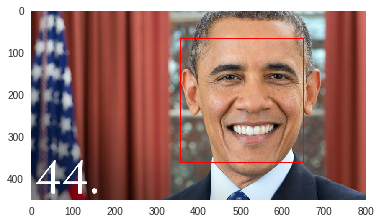

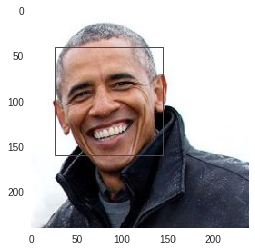

In [0]:
detect_face("/content/obama1.jpg")
detect_face("/content/obama2.jpg")

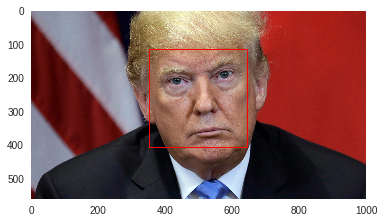

In [0]:
detect_face("/content/trump1.jpg")

In [0]:
def compute_descriptor(image_path):
    dlib_img = dlib.load_rgb_image(image_path)
    dlib_detections = dlib_detector(dlib_img, 1)
    shape = dlib_sp(dlib_img, dlib_detections[0].rect)        
    
    dlib_face_descriptors = list(dlib_facerec.compute_face_descriptor(dlib_img, shape)) 
    return dlib_face_descriptors

In [0]:
descriptor_1 = compute_descriptor("/content/obama1.jpg")
descriptor_2 = compute_descriptor("/content/obama2.jpg")
descriptor_3 = compute_descriptor("/content/trump1.jpg")

In [0]:
from scipy.spatial import distance

print(f"obama1 vs obama2 {distance.euclidean(descriptor_1, descriptor_2)}")

# obama vs trump
print(f"obama1 vs trump1 {distance.euclidean(descriptor_1, descriptor_3)}")
print(f"obama2 vs trump1 {distance.euclidean(descriptor_2, descriptor_3)}")


obama1 vs obama2 0.3220844042595041
obama1 vs trump1 0.8483394655546409
obama2 vs trump1 0.8287296012778234
